This example shows how to use an atmosphere model and obtain density ratios in order to use them in the future for density correction method in airspeed correction. Importing atmosphere model here. Use "atmosisa" on matlab for same purpose.

In [1]:
from ambiance import Atmosphere

In [2]:
import numpy as np

In [7]:
sealevel = Atmosphere(0) #Use altitude in meters
print(sealevel.pressure) #.pressure to obtain pressure.
print(f"Pressure: {sealevel.pressure[0]}") #it indexes as an array's 0th element. And pressure is in Pa

[101325.]
Pressure: 101325.0


In [14]:
altitude = Atmosphere(10000)
print(f"Pressure at 10 kilometers: {altitude.pressure[0]:1.2f} Pa") #1.2f for showing how many digits after .

Pressure at 10 kilometers: 26499.87 Pa


This lib is also could be used to obtain density values:

In [18]:
print(f"Density at 10 kilometers: {altitude.density[0]:1.4f} kg/m^3") #1.2f for showing how many digits after .
print(f"Density at sea level: {sealevel.density[0]:1.4f} kg/m^3") #1.2f for showing how many digits after .

Density at 10 kilometers: 0.4135 kg/m^3
Density at sea level: 1.2250 kg/m^3


Let's find density ratio in order to use it on density correction model for airspeed

In [19]:
dratio=altitude.density/sealevel.density
print(f"Density Ratio at sea level and 10 km: {dratio[0]:1.4f} ") #1.2f for showing how many digits after .

Density Ratio at sea level and 10 km: 0.3376 


Comparing Altitude vs Density Ratio

Text(0, 0.5, 'Density Ratio, $\\sigma$')

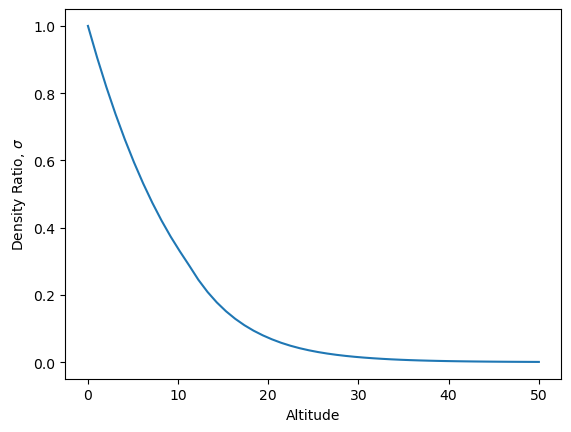

In [34]:
altitudes = np.linspace(0, 50, 50)
atm = Atmosphere(altitudes*1e3) #atmospheres axis, converting kilometers to meters with 1e3
import matplotlib.pyplot as plt
densratio = [atmos/1.225 for atmos in list(atm.density)]
plt.figure()
plt.plot(altitudes, densratio)
plt.xlabel("Altitude")
plt.ylabel("Density Ratio, $\sigma$")